# Daten importieren
*Datenquelle: [https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction/data](https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction/data)*

In [ ]:
import pandas as pd

df = pd.read_csv("ford_data_2.csv")
df

,year,mileage,tax,mpg,engineSize,price
0,2017,15944,150,57.7,1.0,12000
1,2018,9083,150,57.7,1.0,14000
2,2017,12456,150,57.7,1.0,13000
3,2019,10460,145,40.3,1.5,17500
4,2019,1482,145,48.7,1.0,16500
...,...,...,...,...,...,...
995,2017,37920,145,74.3,1.5,10500
996,2018,13485,145,57.7,1.0,13650
997,2018,12946,145,65.7,1.0,10850
998,2018,15237,145,64.2,1.1,9650


In [ ]:
df.describe()

,year,mileage,tax,mpg,engineSize,price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,2016.972000,22295.988000,108.300000,58.298600,1.381100,12403.49700
std,1.653466,16038.199491,62.882145,9.766185,0.466273,4585.60328
min,2013.000000,5.000000,0.000000,20.900000,1.000000,4198.00000
25%,2016.000000,10248.750000,30.000000,54.300000,1.000000,9199.75000
50%,2017.000000,18095.000000,145.000000,58.900000,1.200000,11489.00000
75%,2018.000000,30681.750000,145.000000,65.700000,1.500000,14998.00000
max,2020.000000,85000.000000,570.000000,88.300000,5.000000,42489.00000


In [ ]:
df.isnull().sum() / len(df)

year          0.0
mileage       0.0
tax           0.0
mpg           0.0
engineSize    0.0
price         0.0
dtype: float64

# Daten aufteilen

In [ ]:
X = df.copy()
y = X.pop("price")

In [ ]:
X

,year,mileage,tax,mpg,engineSize
0,2017,15944,150,57.7,1.0
1,2018,9083,150,57.7,1.0
2,2017,12456,150,57.7,1.0
3,2019,10460,145,40.3,1.5
4,2019,1482,145,48.7,1.0
...,...,...,...,...,...
995,2017,37920,145,74.3,1.5
996,2018,13485,145,57.7,1.0
997,2018,12946,145,65.7,1.0
998,2018,15237,145,64.2,1.1


In [ ]:
y

0      12000
1      14000
2      13000
3      17500
4      16500
       ...  
995    10500
996    13650
997    10850
998     9650
999     9950
Name: price, Length: 1000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Neuronales Netz erstellen (Regression)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

model_1 = tf.keras.Sequential([
    layers.Dense(units=5, activation="relu", input_shape=[5]),
    layers.Dense(units=5, activation="relu"),
    layers.Dense(units=1, activation="linear"),
])

model_1.compile(optimizer="adam", loss="mae")

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

pipeline_1 = Pipeline(steps=[
    ("scaler", standard_scaler),
    ("model", model_1)
])

In [ ]:
pipeline_1.fit(X_train, y_train, model__batch_size=512, model__epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 12473.2930
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 12473.2764
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 12473.2617
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 12473.2451
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 12473.2305
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 12473.2129
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 12473.1973
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 12473.1816
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 12473.1650
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 12473.1475
Epoch 11/100
2/2 [==============================] - 0s 16ms/step - loss: 12473.1299
Epoch 12/100
2/2 [==============================] - 0s 14ms/step - loss: 12473.1123
Epoch

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 <keras.src.engine.sequential.Sequential object at 0x7d00440c3eb0>)])

In [ ]:
from sklearn.metrics import mean_absolute_error

y_predict_1 = pipeline_1.predict(X_test)
mae = mean_absolute_error(y_predict_1, y_test)

print("MAE:", mae)

7/7 [==============================] - 0s 3ms/step
MAE: 12116.974293553829


# Hyperparameteroptimierung

In [ ]:
def create_neural_network(hidden_layers, hidden_layer_neurons, input_shape, hidden_layer_activation,
                 output_neurons, output_activation, optimizer, loss):
    model = tf.keras.Sequential()
    model.add(layers.Dense(units=hidden_layer_neurons, activation=hidden_layer_activation, input_shape=input_shape))

    for _ in range(hidden_layers - 1):
        model.add(layers.Dense(units=hidden_layer_neurons, activation=hidden_layer_activation))

    model.add(layers.Dense(units=output_neurons, activation=output_activation))
    model.compile(optimizer=optimizer, loss=loss)
    return model


In [ ]:
model_1 = create_neural_network(hidden_layers=2, hidden_layer_neurons=5, input_shape=[5], hidden_layer_activation="relu",
                 output_neurons=1, output_activation="linear", optimizer="adam", loss="mae")

In [ ]:
!pip install scikeras==0.12.0

In [ ]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

model_2 = KerasRegressor(model=create_neural_network)


pipeline_2 = Pipeline(steps=[
    ("scaler", standard_scaler),
    ("regressor", model_2)
])

param_grid = {
    "regressor__model__hidden_layers": [2, 3],
    "regressor__model__hidden_layer_neurons": [5, 10],
    "regressor__model__input_shape": [[5]],
    "regressor__model__hidden_layer_activation": ["relu"],
    "regressor__model__output_neurons": [1],
    "regressor__model__output_activation": ["linear"],
    "regressor__model__optimizer": ["adam"],
    "regressor__model__loss": ["mae"],
}

grid_search = GridSearchCV(pipeline_2, param_grid, cv=4, scoring="neg_mean_absolute_error")
grid_search.fit(X_train, y_train, regressor__batch_size=512, regressor__epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 12667.2061
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 12667.1885
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 12667.1699
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 12667.1533
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 12667.1348
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 12667.1162
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 12667.0996
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 12667.0820
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 12667.0645
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 12667.0459
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - loss: 12667.0273
Epoch 12/100
2/2 [==============================] - 0s 9ms/step - loss: 12667.0088
Epoch 13/100

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor',
                                        KerasRegressor(model=<function create_neural_network at 0x7d0055be4700>))]),
             param_grid={'regressor__model__hidden_layer_activation': ['relu'],
                         'regressor__model__hidden_layer_neurons': [5, 10],
                         'regressor__model__hidden_layers': [2, 3],
                         'regressor__model__input_shape': [[5]],
                         'regressor__model__loss': ['mae'],
                         'regressor__model__optimizer': ['adam'],
                         'regressor__model__output_activation': ['linear'],
                         'regressor__model__output_neurons': [1]},
             scoring='neg_mean_absolute_error')

In [ ]:
print("Best Mean Absolute Error: ", -grid_search.best_score_)
print("Best Parameters: ", grid_search.best_params_)

Best Mean Absolute Error:  12458.12621669203
Best Parameters:  {'regressor__model__hidden_layer_activation': 'relu', 'regressor__model__hidden_layer_neurons': 10, 'regressor__model__hidden_layers': 3, 'regressor__model__input_shape': [5], 'regressor__model__loss': 'mae', 'regressor__model__optimizer': 'adam', 'regressor__model__output_activation': 'linear', 'regressor__model__output_neurons': 1}


# Early Stopping, um *epochs* besser zu bestimmen

In [ ]:
early_stopping_model = create_neural_network(hidden_layers=3, hidden_layer_neurons=10, input_shape=[5], hidden_layer_activation="relu",
                 output_neurons=1, output_activation="linear", optimizer="adam", loss="mae")

early_stopping_pipeline = Pipeline(steps=[
    ("scaler", standard_scaler),
    ("model", early_stopping_model)
])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

X_train_new, X_valid, y_train_new, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
early_stopping = EarlyStopping(min_delta=0.0001, patience=50)

standard_scaler.fit(X_train_new)

early_stopping_pipeline.fit(
    X_train_new, y_train_new,
    model__validation_data=(standard_scaler.transform(X_valid), y_valid),
    model__batch_size=512,
    model__epochs=50000,
    model__callbacks=[early_stopping]
)

Epoch 1/50000
2/2 [==============================] - 1s 202ms/step - loss: 12320.7520 - val_loss: 13085.6797
Epoch 2/50000
2/2 [==============================] - 0s 35ms/step - loss: 12320.7051 - val_loss: 13085.6328
Epoch 3/50000
2/2 [==============================] - 0s 33ms/step - loss: 12320.6582 - val_loss: 13085.5859
Epoch 4/50000
2/2 [==============================] - 0s 33ms/step - loss: 12320.6104 - val_loss: 13085.5371
Epoch 5/50000
2/2 [==============================] - 0s 35ms/step - loss: 12320.5615 - val_loss: 13085.4893
Epoch 6/50000
2/2 [==============================] - 0s 34ms/step - loss: 12320.5117 - val_loss: 13085.4395
Epoch 7/50000
2/2 [==============================] - 0s 37ms/step - loss: 12320.4619 - val_loss: 13085.3887
Epoch 8/50000
2/2 [==============================] - 0s 37ms/step - loss: 12320.4102 - val_loss: 13085.3389
Epoch 9/50000
2/2 [==============================] - 0s 34ms/step - loss: 12320.3584 - val_loss: 13085.2871
Epoch 10/50000
2/2 [=======

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 <keras.src.engine.sequential.Sequential object at 0x7d00318d6380>)])

# Besten Wert für *epochs* ausgeben:

In [ ]:
best_number_of_epochs = early_stopping.best_epoch + 1
best_number_of_epochs

1766

# Ergebnisse visualisieren

In [ ]:
import seaborn as sns

history = early_stopping_pipeline.named_steps["model"].history.history
history_df = pd.DataFrame(history)
history_df

,loss,val_loss
0,12320.751953,13085.679688
1,12320.705078,13085.632812
2,12320.658203,13085.585938
3,12320.610352,13085.537109
4,12320.561523,13085.489258
...,...,...
1811,1496.067139,1554.143188
1812,1496.001709,1553.880127
1813,1495.835449,1553.349365
1814,1495.657593,1553.055664


<Axes: >

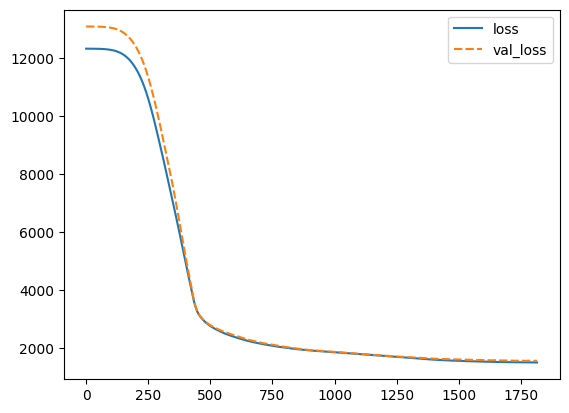

In [ ]:
sns.lineplot(history_df)

# Finales neuronales Netz

In [ ]:
final_model = create_neural_network(hidden_layers=3, hidden_layer_neurons=10, input_shape=[5], hidden_layer_activation="relu",
                 output_neurons=1, output_activation="linear", optimizer="adam", loss="mae")

final_pipeline = Pipeline(steps=[
    ("scaler", standard_scaler),
    ("model", final_model)
])

final_pipeline.fit(X_train, y_train, model__batch_size=512, model__epochs=best_number_of_epochs)

Epoch 1/1766
2/2 [==============================] - 1s 8ms/step - loss: 12473.6611
Epoch 2/1766
2/2 [==============================] - 0s 8ms/step - loss: 12473.6377
Epoch 3/1766
2/2 [==============================] - 0s 10ms/step - loss: 12473.6152
Epoch 4/1766
2/2 [==============================] - 0s 9ms/step - loss: 12473.5889
Epoch 5/1766
2/2 [==============================] - 0s 8ms/step - loss: 12473.5654
Epoch 6/1766
2/2 [==============================] - 0s 8ms/step - loss: 12473.5371
Epoch 7/1766
2/2 [==============================] - 0s 9ms/step - loss: 12473.5098
Epoch 8/1766
2/2 [==============================] - 0s 8ms/step - loss: 12473.4824
Epoch 9/1766
2/2 [==============================] - 0s 8ms/step - loss: 12473.4521
Epoch 10/1766
2/2 [==============================] - 0s 9ms/step - loss: 12473.4229
Epoch 11/1766
2/2 [==============================] - 0s 8ms/step - loss: 12473.3896
Epoch 12/1766
2/2 [==============================] - 0s 7ms/step - loss: 12473.3574


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 <keras.src.engine.sequential.Sequential object at 0x7d00381142b0>)])

# Finales Ergebnis (MAE)

In [ ]:
y_predict_final = final_pipeline.predict(X_test)
mae = mean_absolute_error(y_predict_final, y_test)

print("Final MAE:", mae)

7/7 [==============================] - 0s 3ms/step
Final MAE: 1377.0308642578125
